This is an R notebook

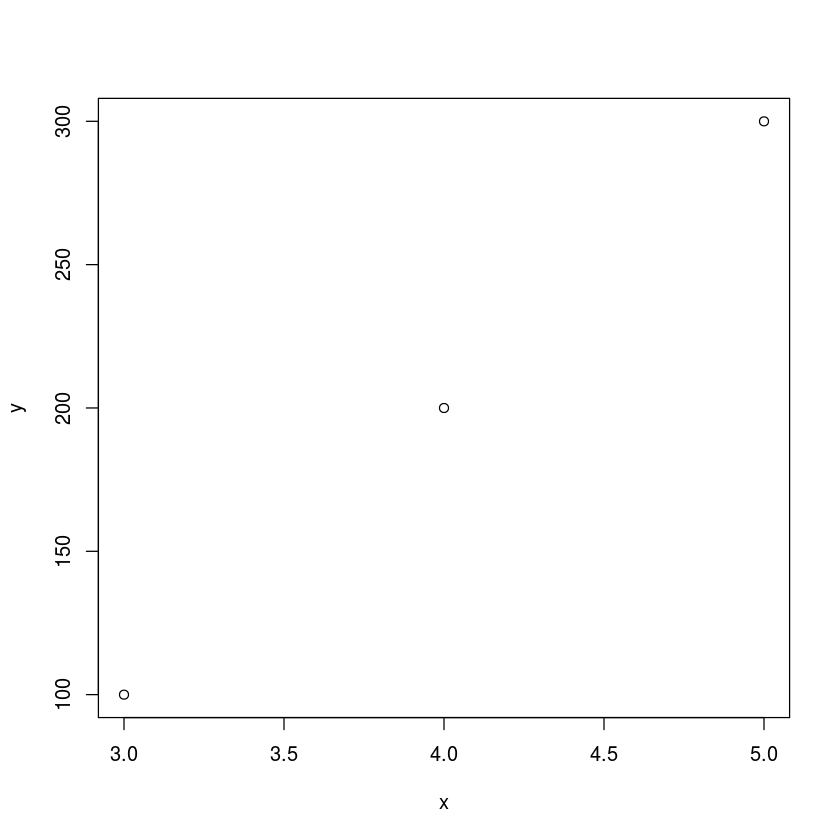

In [3]:
x = c(3, 4, 5)
y = c(100, 200, 300)

plot(x, y)